# Import Library & CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [2]:
df_customer = pd.read_csv("../data/temp1/output/customer_processed.csv")
df_trans = pd.read_csv("../data/temp1/output/transaction_processed.csv")
df_product = pd.read_csv("../data/temp1/output/product_processed.csv")
df_merge = pd.read_csv("../data/temp1/output/merge.csv")
df_daily_sales = pd.read_csv("../data/temp1/output/daily_sales.csv")
df_daily_sales_detail = pd.read_csv("../data/temp1/output/daily_sales_detail.csv")

# Convert Object to Date 

In [3]:
df_customer.info()
df_trans.info()
df_product.info()
df_merge.info()
df_daily_sales.info()
df_daily_sales_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    3800 non-null   object
 1   name           3800 non-null   object
 2   hiragana       3800 non-null   object
 3   birth_date     3800 non-null   object
 4   gender         3800 non-null   object
 5   email          3800 non-null   object
 6   phone_number   3800 non-null   object
 7   mobile_number  3800 non-null   object
 8   post_code      3800 non-null   object
 9   address        3800 non-null   object
dtypes: object(10)
memory usage: 297.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_id     2849 non-null   object
 1   transaction_date   2849 non-null   object
 2   customer_id        2849 non-null   

In [4]:
df_customer['birth_date'] = pd.to_datetime(df_customer['birth_date'], format='%Y-%m-%d')
df_trans['transaction_date'] = pd.to_datetime(df_trans['transaction_date'], format='%Y-%m-%d')
df_trans['shipping_date'] = pd.to_datetime(df_trans['shipping_date'], format='%Y-%m-%d')
df_trans['cancellation_date'] = pd.to_datetime(df_trans['cancellation_date'], format='%Y-%m-%d')
df_merge['birth_date'] = pd.to_datetime(df_merge['birth_date'], format='%Y-%m-%d')
df_merge['transaction_date'] = pd.to_datetime(df_merge['transaction_date'], format='%Y-%m-%d')
df_merge['shipping_date'] = pd.to_datetime(df_merge['shipping_date'], format='%Y-%m-%d')
df_merge['cancellation_date'] = pd.to_datetime(df_merge['cancellation_date'], format='%Y-%m-%d')
df_daily_sales['transaction_date'] = pd.to_datetime(df_daily_sales['transaction_date'], format='%Y-%m-%d')
df_daily_sales_detail['transaction_date'] = pd.to_datetime(df_daily_sales_detail['transaction_date'], format='%Y-%m-%d')

# Data Visualization

## Time Series

### Daily Sales

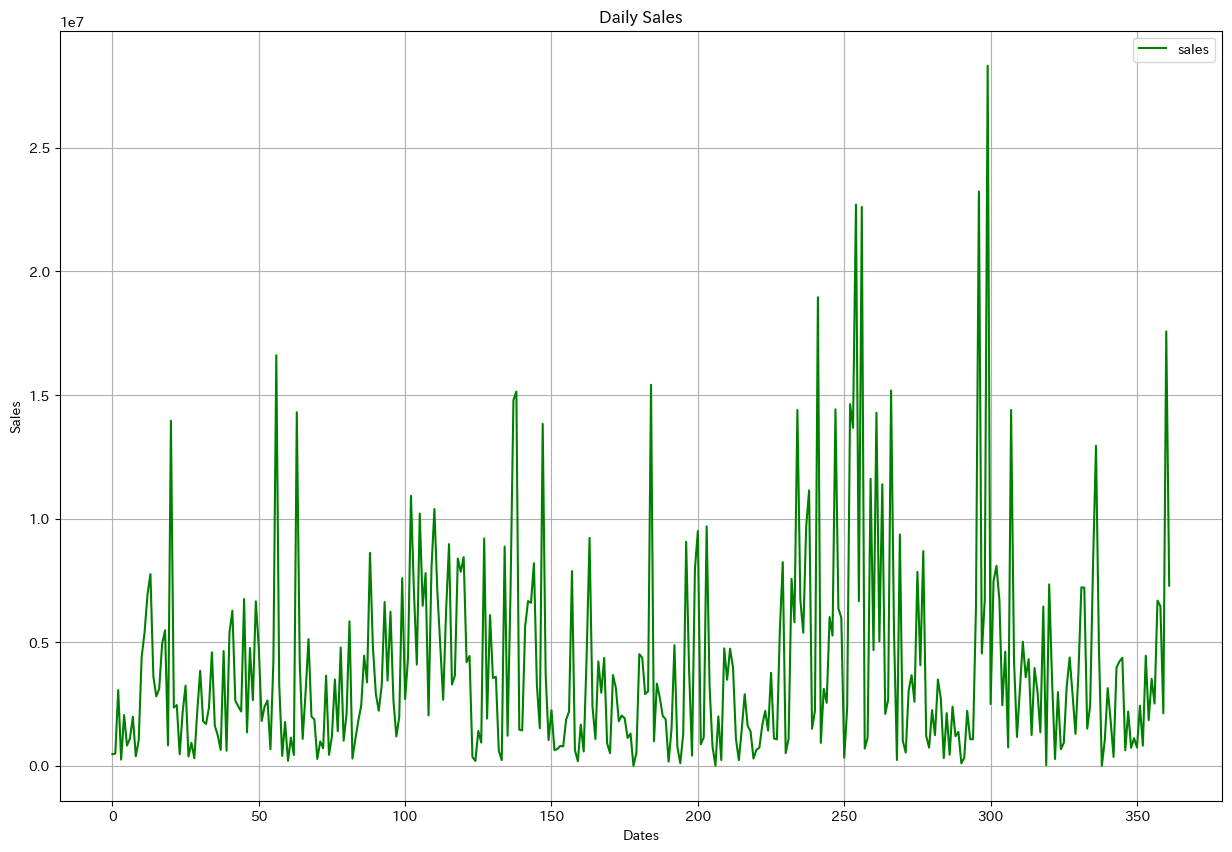

In [5]:
plt.figure(figsize=(15,10))
plt.plot(df_daily_sales['sales'],linestyle='-', color='green', label='sales')

plt.title('Daily Sales')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Daily Sales - Filter by Date

                     sales
transaction_date          
2020-01-02          779400
2020-01-03            1230
2020-01-04         1992800
2020-01-05          231400
2020-01-06         4749100
...                    ...
2020-03-23         2095132
2020-03-24         2670482
2020-03-26        15180640
2020-03-29         5425063
2020-03-30          231400

[64 rows x 1 columns]


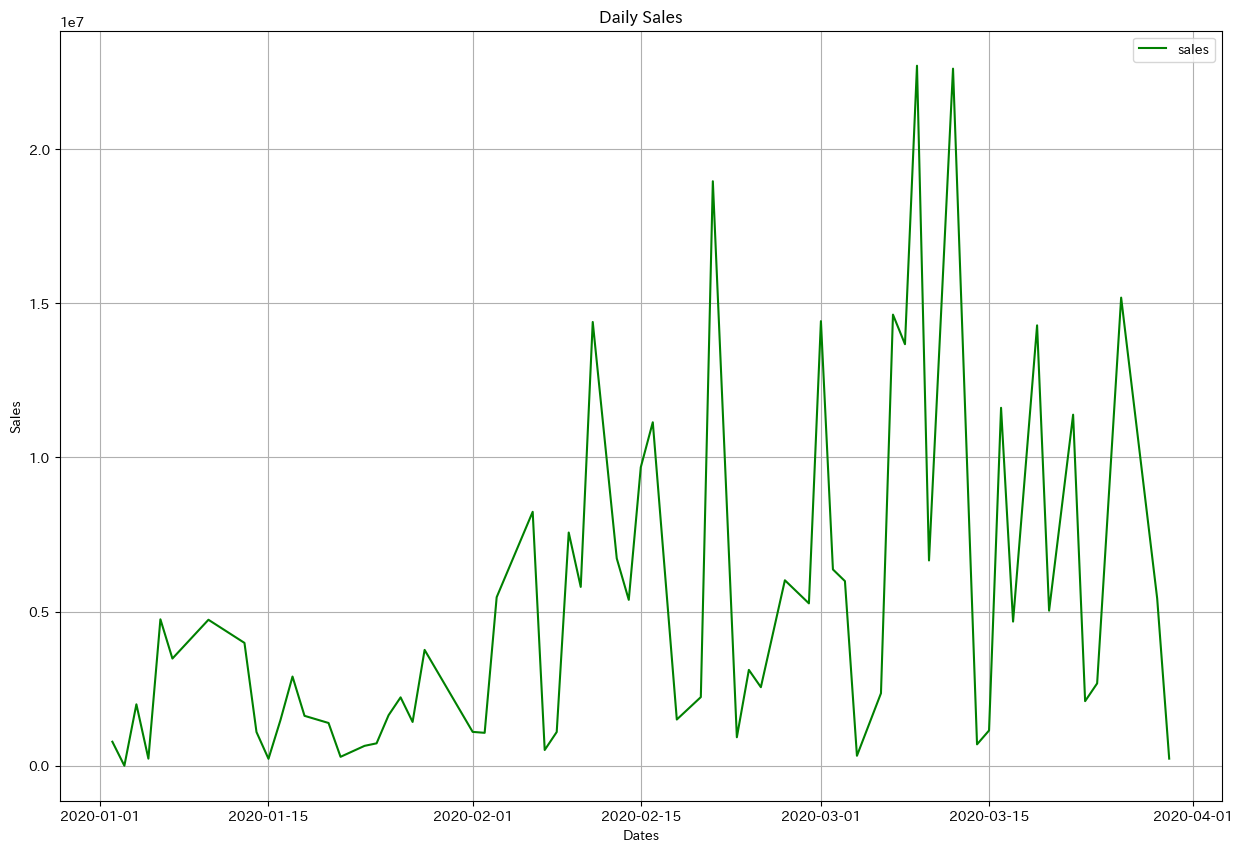

,sales
transaction_date,
2020-01-02,779400
2020-01-03,1230
2020-01-04,1992800
2020-01-05,231400
2020-01-06,4749100
...,...
2020-03-23,2095132
2020-03-24,2670482
2020-03-26,15180640


In [6]:
# Filter by Date
start_date = "2020-01-01"
end_date = "2020-03-30"
df_daily_sales_filtered = df_daily_sales[["transaction_date", "sales"]]
df_daily_sales_filtered.set_index('transaction_date', inplace=True)
df_daily_sales_filtered = df_daily_sales_filtered.loc[start_date:end_date]
print(df_daily_sales_filtered)

# Plot
plt.figure(figsize=(15,10))
plt.plot(df_daily_sales_filtered['sales'],linestyle='-', color='green', label='sales')
plt.title('Daily Sales')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
df_daily_sales_filtered

### Daily Sales - Moving Average

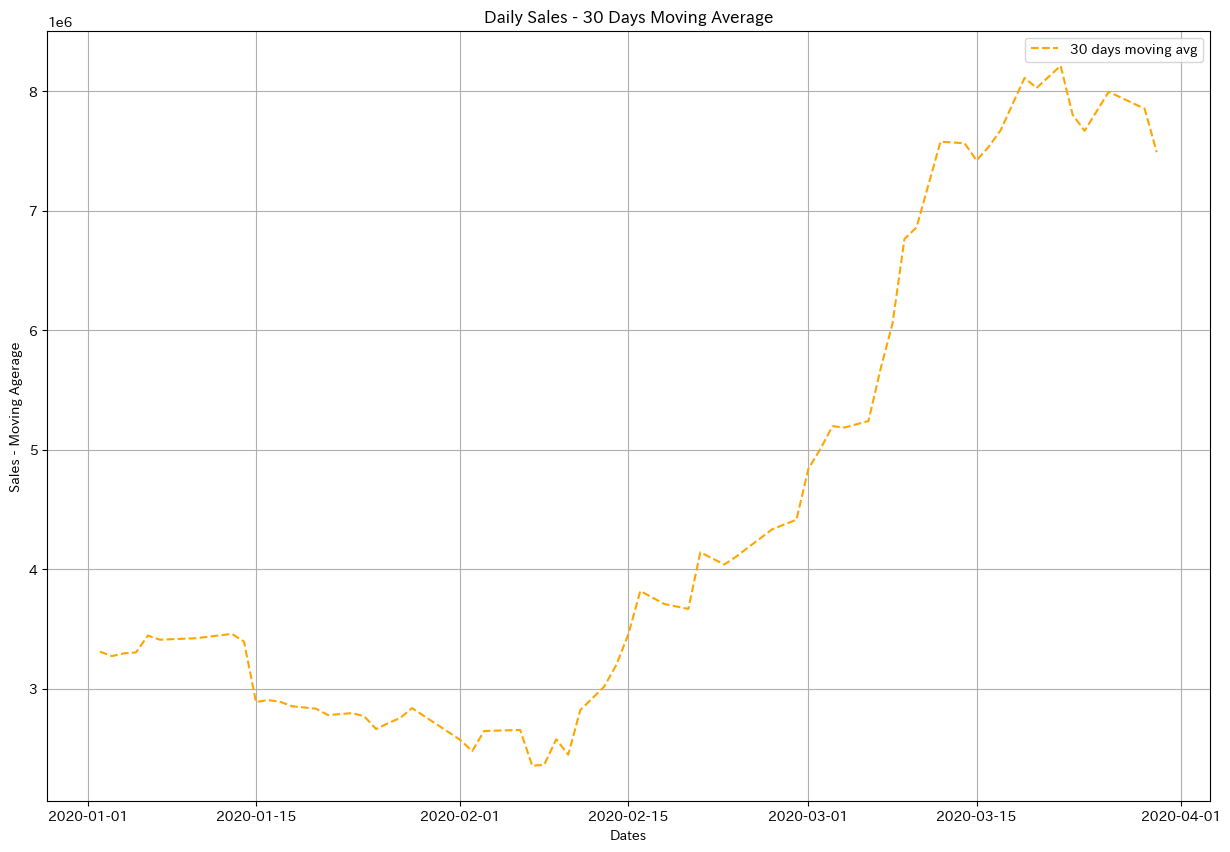

In [7]:
df_daily_sales_moving_avg = df_daily_sales.copy()
# Add "Moving Agerage" Column
df_daily_sales_moving_avg['moving_avg'] = df_daily_sales_moving_avg['sales'].rolling(window=30).mean()

# Filter by Date
start_date = "2020-01-01"
end_date = "2020-03-30"
df_daily_sales_moving_avg.set_index('transaction_date', inplace=True)
df_daily_sales_moving_avg = df_daily_sales_moving_avg.loc[start_date:end_date]

# Plot
plt.figure(figsize=(15,10))
plt.plot(df_daily_sales_moving_avg['moving_avg'], linestyle='--', color='orange', label='30 days moving avg')

plt.title('Daily Sales - 30 Days Moving Average')
plt.xlabel('Dates')
plt.ylabel('Sales - Moving Agerage')
plt.legend()
plt.grid(True)
plt.show()

#### Daily Sales by Category

In [31]:
df_merge.groupby(["transaction_date","category"]).sum()[["sales", "count"]]

sales  count
transaction_date category                
2019-04-01       ノートPC      449400      3
                 周辺機器        16300      1
2019-04-03       デスクトップ     464400      3
                 周辺機器        22686      6
2019-04-04       デスクトップ     524700      3
...                            ...    ...
2020-08-01       周辺機器       150535     14
2020-08-02       タブレット       45342      1
                 デスクトップ    3638400     18
                 ノートPC     3587500     16
                 周辺機器        13803      5

[950 rows x 2 columns]

In [32]:
pd.pivot_table(df_merge, index='category', columns='transaction_date', values=['sales','count'],aggfunc='sum')

count                                              \
transaction_date 2019-04-01 2019-04-03 2019-04-04 2019-04-05 2019-04-06   
category                                                                  
タブレット                   NaN        NaN        NaN        2.0        NaN   
デスクトップ                  NaN        3.0        3.0        1.0        3.0   
ノートPC                   3.0        NaN       13.0        NaN        9.0   
周辺機器                    1.0        6.0        NaN        NaN        1.0   

                                                                         ...  \
transaction_date 2019-04-10 2019-04-12 2019-04-13 2019-04-18 2019-04-20  ...   
category                                                                 ...   
タブレット                   4.0        NaN        NaN        3.0        NaN  ...   
デスクトップ                  0.0        2.0        2.0        NaN        4.0  ...   
ノートPC                   2.0        2.0        5.0        NaN        1.0  ...   
周辺機器                    NaN        8.0        NaN        3.0        NaN  ...   

                      sales                                              \
transaction_date 2020-07-18 2020-07-19 2020-07-20 2020-07-21 2020-07-23   
category                                                                  
タブレット                   NaN        NaN        NaN        NaN        NaN   
デスクトップ                  NaN  2466900.0  1262400.0  1518400.0  2188800.0   
ノートPC              799000.0  1971400.0   579800.0  1994600.0   319600.0   
周辺機器                11343.0    12636.0        NaN        NaN     5662.0   

                                                                          
transaction_date 2020-07-24 2020-07-25 2020-07-27  2020-08-01 2020-08-02  
category                                                                  
タブレット              294026.0        NaN        NaN     44910.0    45342.0  
デスクトップ            1574100.0  3942900.0        NaN  14071100.0  3638400.0  
ノートPC             4767000.0  2513200.0  2118400.0   3303040.0  3587500.0  
周辺機器                44403.0        NaN        NaN    150535.0    13803.0  

[4 rows x 724 columns]

In [38]:
df_daily_sales_by_category = pd.pivot_table(df_merge, index='transaction_date', columns='category', values=['sales'],aggfunc='sum')
df_daily_sales_by_category.head()

sales                              
category            タブレット    デスクトップ      ノートPC     周辺機器
transaction_date                                       
2019-04-01            NaN       NaN   449400.0  16300.0
2019-04-03            NaN  464400.0        NaN  22686.0
2019-04-04            NaN  524700.0  2534820.0      NaN
2019-04-05        90684.0  154800.0        NaN      NaN
2019-04-06            NaN  536700.0  1513200.0   1230.0

In [41]:
df_daily_sales_by_category

sales                                 
category             タブレット      デスクトップ      ノートPC      周辺機器
transaction_date                                           
2019-04-01             NaN         NaN   449400.0   16300.0
2019-04-03             NaN    464400.0        NaN   22686.0
2019-04-04             NaN    524700.0  2534820.0       NaN
2019-04-05         90684.0    154800.0        NaN       NaN
2019-04-06             NaN    536700.0  1513200.0    1230.0
...                    ...         ...        ...       ...
2020-07-24        294026.0   1574100.0  4767000.0   44403.0
2020-07-25             NaN   3942900.0  2513200.0       NaN
2020-07-27             NaN         NaN  2118400.0       NaN
2020-08-01         44910.0  14071100.0  3303040.0  150535.0
2020-08-02         45342.0   3638400.0  3587500.0   13803.0

[362 rows x 4 columns]

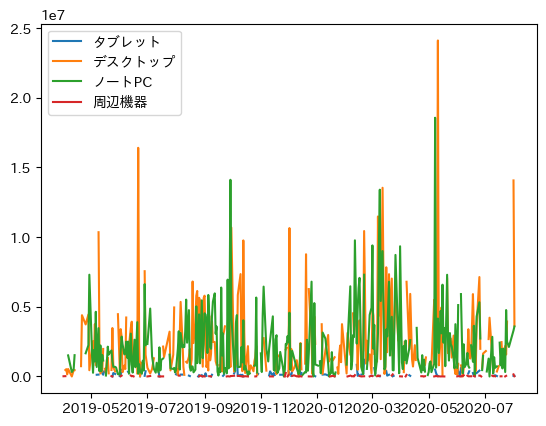

In [45]:

%matplotlib inline
# Make sure to use the .loc accessor with the right MultiIndex keys
plt.plot(df_daily_sales_by_category.index, df_daily_sales_by_category['sales', 'タブレット'], label='タブレット')
plt.plot(df_daily_sales_by_category.index, df_daily_sales_by_category['sales', 'デスクトップ'], label='デスクトップ')
plt.plot(df_daily_sales_by_category.index, df_daily_sales_by_category['sales', 'ノートPC'], label='ノートPC')
plt.plot(df_daily_sales_by_category.index, df_daily_sales_by_category['sales', '周辺機器'], label='周辺機器')

plt.legend()

### Weekly Sales

               sales
week                
2019-03-31   6308920
2019-04-07   3900408
2019-04-14   1409737
2019-04-21   9798640
2019-04-28  24213737
...              ...
2020-07-05  15367049
2020-07-12   5814691
2020-07-19  25455827
2020-07-26  19687985
2020-08-02   7285045

[71 rows x 1 columns]


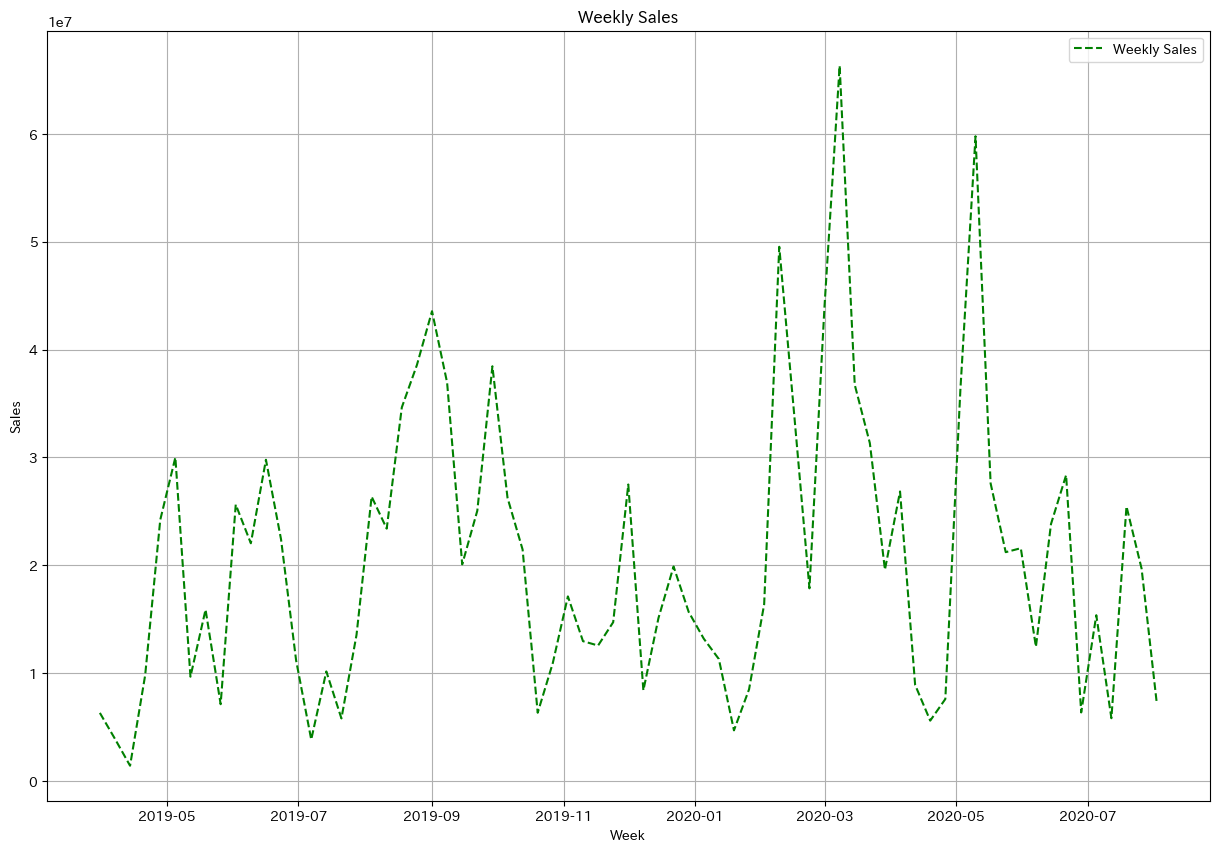

In [8]:
df_weekly_sales = df_daily_sales.copy()
df_weekly_sales.set_index('transaction_date', inplace=True)
df_weekly_sales = df_weekly_sales.resample("W", closed="left", label="left").sum() # Week starts from Sunday
df_weekly_sales = df_weekly_sales[["sales"]]
df_weekly_sales = df_weekly_sales.rename_axis('week')
# Convert 'month' index to string format
# df_monthly_sales.index = df_monthly_sales.index.strftime('%Y-%m')
print(df_weekly_sales)

plt.figure(figsize=(15,10))
plt.plot(df_weekly_sales['sales'], linestyle='--', color='green', label='Weekly Sales')


plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
df_daily_sales_detail[
    (df_daily_sales_detail['transaction_date'] > "2019-12-26") & 
    (df_daily_sales_detail['transaction_date'] < "2020-01-30")
]

,transaction_date,sales,year,month,week,day
201,2019-12-27,864854,2019,12,52,Friday
202,2019-12-28,1144500,2019,12,52,Saturday
203,2019-12-29,9682681,2019,12,53,Sunday
204,2019-12-30,3219470,2019,12,53,Monday
205,2020-01-02,779400,2020,1,1,Thursday
206,2020-01-03,1230,2020,1,1,Friday
207,2020-01-04,1992800,2020,1,1,Saturday
208,2020-01-05,231400,2020,1,2,Sunday
209,2020-01-06,4749100,2020,1,2,Monday
210,2020-01-07,3476676,2020,1,2,Tuesday


In [10]:
# Filter the DataFrame for each year and resample to monthly sales
df_weekly_sales_2019 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2019].groupby("week").agg({"sales":"sum"}).reset_index()
df_weekly_sales_2019.rename(columns={"sales": "2019_sales"}, inplace=True)
df_weekly_sales_2019


,week,2019_sales
0,14,6308920
1,15,3900408
2,16,1409737
3,17,9798640
4,18,24213737
5,19,29998106
6,20,9666092
7,21,15883752
8,22,7114044
9,23,25626611


In [11]:
# Filter the DataFrame for each year and resample to monthly sales
df_weekly_sales_2019 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2019].groupby("week").agg({"sales":"sum"}).reset_index()
df_weekly_sales_2019.rename(columns={"sales": "2019_sales"}, inplace=True)

df_weekly_sales_2020 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2020].groupby("week").agg({"sales":"sum"}).reset_index()
df_weekly_sales_2020.rename(columns={"sales": "2020_sales"}, inplace=True)

# Merge the 2019 and 2020 data
df_weekly_sales_by_year = pd.merge(df_weekly_sales_2019, df_weekly_sales_2020, on="week", how="outer").set_index("week").sort_values('week')

# Calculate Year Over Year growth as integers
df_weekly_sales_by_year['YoY'] = df_weekly_sales_by_year.apply(
    lambda row: int(round((row['2020_sales'] / row['2019_sales'] - 1) * 100))
    if pd.notnull(row['2019_sales']) and pd.notnull(row['2020_sales']) else "-", axis=1
)

# Format the 'YoY' column as a string with a percentage sign
df_weekly_sales_by_year['YoY'] = df_weekly_sales_by_year['YoY'].apply(
    lambda x: f"{x}%" if isinstance(x, int) else x)

# Convert the sales columns to integers if they are not already
df_weekly_sales_by_year['2019_sales'] = df_weekly_sales_by_year['2019_sales'].fillna(0).astype(int)
df_weekly_sales_by_year['2020_sales'] = df_weekly_sales_by_year['2020_sales'].fillna(0).astype(int)

# Calculate Month over Month (MoM) growth for each year
df_weekly_sales_by_year['WoW_2019'] = df_weekly_sales_by_year['2019_sales'].pct_change().fillna(0)
df_weekly_sales_by_year['WoW_2020'] = df_weekly_sales_by_year['2020_sales'].pct_change().fillna(0)

# Convert the MoM columns to percentage format and round to nearest whole number
df_weekly_sales_by_year['WoW_2019'] = df_weekly_sales_by_year['WoW_2019'].apply(lambda x: f"{x:.0%}")
df_weekly_sales_by_year['WoW_2020'] = df_weekly_sales_by_year['WoW_2020'].apply(lambda x: f"{x:.0%}")

# Replace "inf%" by 0%
df_weekly_sales_by_year['WoW_2019'] = df_weekly_sales_by_year['WoW_2019'].apply(lambda x: "0%" if x == "inf%" else x)
df_weekly_sales_by_year['WoW_2020'] = df_weekly_sales_by_year['WoW_2020'].apply(lambda x: "0%" if x == "inf%" else x)


# Display the DataFrame with pandas' option context to suppress scientific notation
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(df_weekly_sales_by_year)


,2019_sales,2020_sales,YoY,WoW_2019,WoW_2020
week,,,,,
1,0,2773430,-,0%,0%
2,0,13191512,-,0%,376%
3,0,11301251,-,0%,-14%
4,0,4689243,-,0%,-59%
5,0,8495062,-,0%,81%
6,0,16374876,-,0%,93%
7,0,49536816,-,0%,203%
8,0,33819748,-,0%,-32%
9,0,17860672,-,0%,-47%


In [12]:
df_weekly_sales_2019.head()

,week,2019_sales
0,14,6308920
1,15,3900408
2,16,1409737
3,17,9798640
4,18,24213737


### Monthly Sales

             sales
month             
2019-04   36095177
2019-05   71591919
2019-06  101550323
2019-07   38092911
2019-08  128297953
2019-09  155575023
2019-10   71258429
2019-11   59586072
2019-12   83788661
2020-01   39351596
2020-02  118691014
2020-03  193484188
2020-04   50964346
2020-05  150489643
2020-06   87366538
2020-07   50934567
2020-08   24854630


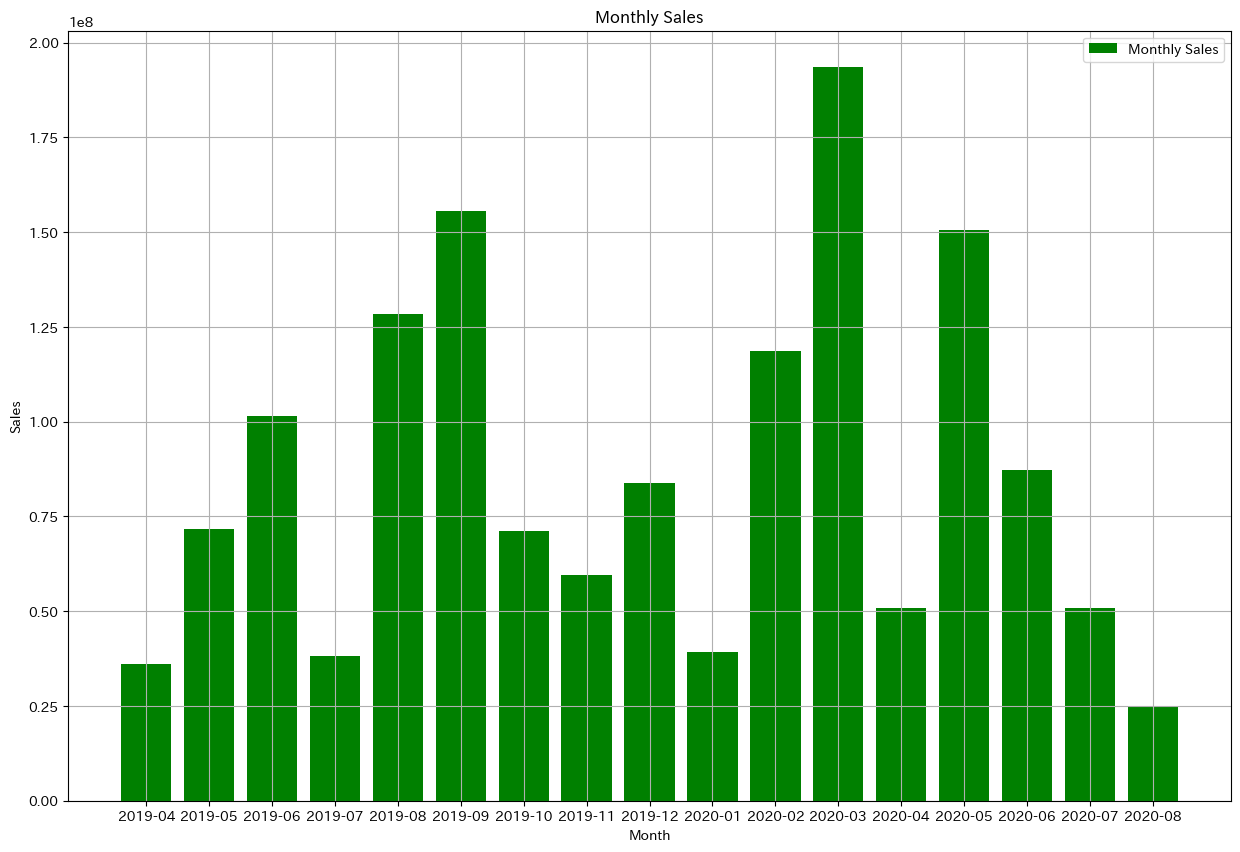

In [13]:
df_monthly_sales = df_daily_sales.copy()
df_monthly_sales.set_index('transaction_date', inplace=True)
df_monthly_sales = df_monthly_sales.resample("MS").sum()
df_monthly_sales = df_monthly_sales[["sales"]]
df_monthly_sales = df_monthly_sales.rename_axis('month')
# Convert 'month' index to string format
df_monthly_sales.index = df_monthly_sales.index.strftime('%Y-%m')
print(df_monthly_sales)

plt.figure(figsize=(15,10))
plt.bar(df_monthly_sales.index, df_monthly_sales['sales'], color='green', label='Monthly Sales')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Filter the DataFrame for each year and resample to monthly sales
df_monthly_sales_2019 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2019].groupby("month").agg({"sales":"sum"}).reset_index()
df_monthly_sales_2019.rename(columns={"sales": "2019_sales"}, inplace=True)

df_monthly_sales_2020 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2020].groupby("month").agg({"sales":"sum"}).reset_index()
df_monthly_sales_2020.rename(columns={"sales": "2020_sales"}, inplace=True)

# Merge the 2019 and 2020 data
df_monthly_sales_by_year = pd.merge(df_monthly_sales_2019, df_monthly_sales_2020, on="month", how="outer").set_index("month").sort_values('month')

# Calculate Year Over Year growth as integers
df_monthly_sales_by_year['YoY'] = df_monthly_sales_by_year.apply(
    lambda row: int(round((row['2020_sales'] / row['2019_sales'] - 1) * 100))
    if pd.notnull(row['2019_sales']) and pd.notnull(row['2020_sales']) else "-", axis=1
)

# Format the 'YoY' column as a string with a percentage sign
df_monthly_sales_by_year['YoY'] = df_monthly_sales_by_year['YoY'].apply(
    lambda x: f"{x}%" if isinstance(x, int) else x)

# Convert the sales columns to integers if they are not already
df_monthly_sales_by_year['2019_sales'] = df_monthly_sales_by_year['2019_sales'].fillna(0).astype(int)
df_monthly_sales_by_year['2020_sales'] = df_monthly_sales_by_year['2020_sales'].fillna(0).astype(int)

# Calculate Month over Month (MoM) growth for each year
df_monthly_sales_by_year['MoM_2019'] = df_monthly_sales_by_year['2019_sales'].pct_change().fillna(0)
df_monthly_sales_by_year['MoM_2020'] = df_monthly_sales_by_year['2020_sales'].pct_change().fillna(0)

# Convert the MoM columns to percentage format and round to nearest whole number
df_monthly_sales_by_year['MoM_2019'] = df_monthly_sales_by_year['MoM_2019'].apply(lambda x: f"{x:.0%}")
df_monthly_sales_by_year['MoM_2020'] = df_monthly_sales_by_year['MoM_2020'].apply(lambda x: f"{x:.0%}")

# Replace "inf%" by 0%
df_monthly_sales_by_year['MoM_2019'] = df_monthly_sales_by_year['MoM_2019'].apply(lambda x: "0%" if x == "inf%" else x)
df_monthly_sales_by_year['MoM_2020'] = df_monthly_sales_by_year['MoM_2020'].apply(lambda x: "0%" if x == "inf%" else x)


# Display the DataFrame with pandas' option context to suppress scientific notation
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(df_monthly_sales_by_year)


,2019_sales,2020_sales,YoY,MoM_2019,MoM_2020
month,,,,,
1,0,39351596,-,0%,0%
2,0,118691014,-,0%,202%
3,0,193484188,-,0%,63%
4,36095177,50964346,41%,0%,-74%
5,71591919,150489643,110%,98%,195%
6,101550323,87366538,-14%,42%,-42%
7,38092911,50934567,34%,-62%,-42%
8,128297953,24854630,-81%,237%,-51%
9,155575023,0,-,21%,-100%


In [15]:
df_monthly_sales_2019['2019_sales'].dtype

dtype('int64')

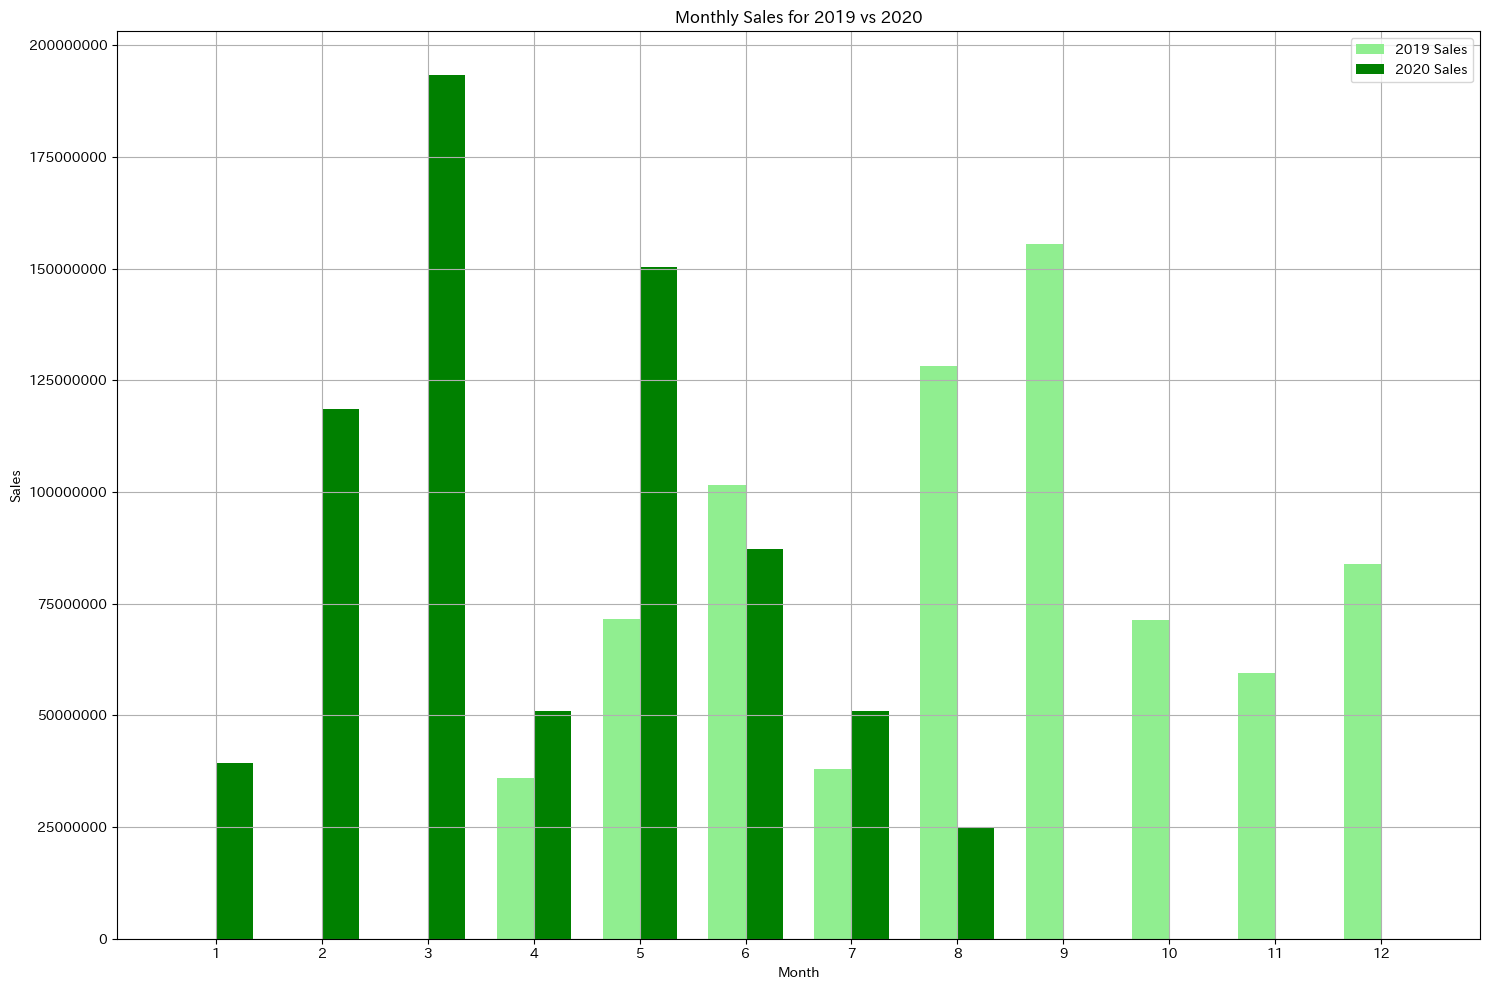

In [16]:
#plot the bar chart
plt.figure(figsize=(15,10))
bar_width = 0.35

index = np.arange(df_monthly_sales_by_year.shape[0])
bar1 = plt.bar(index, df_monthly_sales_by_year['2019_sales'], bar_width, color='lightgreen', label='2019 Sales')
bar2 = plt.bar(index + bar_width, df_monthly_sales_by_year['2020_sales'], bar_width,color='green', label='2020 Sales')

# Stop displaying scientific notation
from matplotlib.ticker import ScalarFormatter
y_formatter = ScalarFormatter(useOffset=False)
y_formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales for 2019 vs 2020')
plt.xticks(index + bar_width / 2, df_monthly_sales_by_year.index)  # Set the position of the x-ticks
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#### Monthly Sales by Category

In [18]:
df_merge.head(2)

,transaction_id,transaction_date,customer_id,product_id,count,sales,shipping_date,cancellation_date,status,name,...,email,phone_number,mobile_number,post_code,address,product_name,brand,category,color,price
0,201904010000-1,2019-04-01,C-001213,CANB3,3,449400,2019-04-12,NaT,配達済み,安部 真一郎,...,abe_shinichirou@example.ne.jp,04-7471-0215,090-4544-4900,350-3609,埼玉県川口市本町3-2-10,Caps-A3-Mod,caps,ノートPC,Varied,156361.08
1,201904010003-1,2019-04-01,C-001572,ID16,1,16300,2019-04-09,NaT,配達済み,古川 亜衣子,...,aikofurukawa@example.ne.jp,023-795-2131,090-0857-1626,993-6204,山形県酒田市亀ケ崎3-3-4デリード416,Display-16-Mod,ディスプレイ,周辺機器,Varied,16822.12


In [23]:
df_merge.columns

Index(['transaction_id', 'transaction_date', 'customer_id', 'product_id',
       'count', 'sales', 'shipping_date', 'cancellation_date', 'status',
       'name', 'hiragana', 'birth_date', 'gender', 'email', 'phone_number',
       'mobile_number', 'post_code', 'address', 'product_name', 'brand',
       'category', 'color', 'price', 'transaction_month'],
      dtype='object')

In [24]:
df_merge['transaction_month'] = df_merge['transaction_date'].dt.strftime("%Y%m")
df_merge.groupby(["transaction_month","category"]).sum()[["sales", "count"]]

sales  count
transaction_month category                 
201904            タブレット      1187788     14
                  デスクトップ    16354640     59
                  ノートPC     18368860     80
                  周辺機器        183889     21
201905            タブレット      2139702     37
...                              ...    ...
202007            周辺機器        189703     44
202008            タブレット        90252      4
                  デスクトップ    17709500     71
                  ノートPC      6890540     34
                  周辺機器        164338     19

[68 rows x 2 columns]

In [26]:
pd.pivot_table(df_merge, index='category', columns='transaction_month',values=['sales','count'],aggfunc='sum')

count                                                   \
transaction_month 201904 201905 201906 201907 201908 201909 201910 201911   
category                                                                    
タブレット                 14     37     38     16     32     21     47     28   
デスクトップ                59    169    187     79    265    208    155     69   
ノートPC                 80    162    214     90    304    477    132    226   
周辺機器                  21     39     58     11     55     50     34     29   

                                 ...     sales                                \
transaction_month 201912 202001  ...    201911    201912    202001    202002   
category                         ...                                           
タブレット                 28     13  ...   1099624   2302716    498330   2850538   
デスクトップ               235     99  ...  14574820  46835180  25103040  48610920   
ノートPC                158     76  ...  43579340  34296440  13631340  66880480   
周辺機器                  27     30  ...    332288    354325    118886    349076   

                                                                               
transaction_month    202003    202004    202005    202006    202007    202008  
category                                                                       
タブレット               1897590    523590   1213578   3176396    520304     90252  
デスクトップ             92724300  28141100  69699920  38694820  25298460  17709500  
ノートPC              98332720  21800060  79324940  45060700  24926100   6890540  
周辺機器                 529578    499596    251205    434622    189703    164338  

[4 rows x 34 columns]

In [29]:
df_monthly_sales_by_category = pd.pivot_table(df_merge, index='transaction_month', columns='category', values='sales', aggfunc='sum')
df_monthly_sales_by_category.head()

category,タブレット,デスクトップ,ノートPC,周辺機器
transaction_month,,,,
201904,1187788,16354640,18368860,183889
201905,2139702,38187920,30868960,395337
201906,2288276,56748480,42137680,375887
201907,725472,17925000,19367500,74939
201908,1420736,67397780,59091200,388237


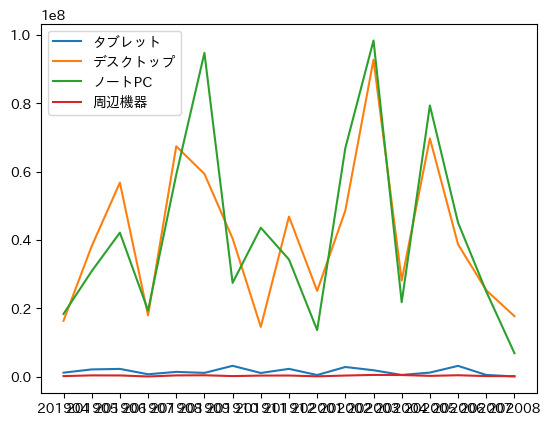

In [30]:
%matplotlib inline
plt.plot(list(df_monthly_sales_by_category.index),df_monthly_sales_by_category['タブレット'], label='タブレット')
plt.plot(list(df_monthly_sales_by_category.index),df_monthly_sales_by_category['デスクトップ'], label='デスクトップ')
plt.plot(list(df_monthly_sales_by_category.index),df_monthly_sales_by_category['ノートPC'], label='ノートPC')
plt.plot(list(df_monthly_sales_by_category.index),df_monthly_sales_by_category['周辺機器'], label='周辺機器')

plt.legend()